In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import resample
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
#USING CROSS VALIDATION
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

In [5]:
df = pd.read_csv('../../../../datasets/parte1/dataset_cleaned.csv')

In [6]:
X = df.drop(['MaxTemp'], axis=1)
y = df['MaxTemp']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

In [8]:
# Use GridSearchCV para encontrar os melhores hiperparâmetros
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

model = DecisionTreeRegressor(random_state=2023)

In [9]:
grid_search = GridSearchCV(model, param_grid, cv=5, verbose=2, refit=True)
grid_search.fit(X_train, y_train)

model = grid_search.best_estimator_

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, max_fe

/home/goncalo/miniconda3/envs/daa310/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/home/goncalo/miniconda3/envs/daa310/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/goncalo/miniconda3/envs/daa310/lib/python3.10/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/home/goncalo/miniconda3/envs/daa310/lib/python3.10/site-packages/sklearn/base.py", line 637, in _validate

In [10]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 10}

In [11]:
predictions = model.predict(X_test)


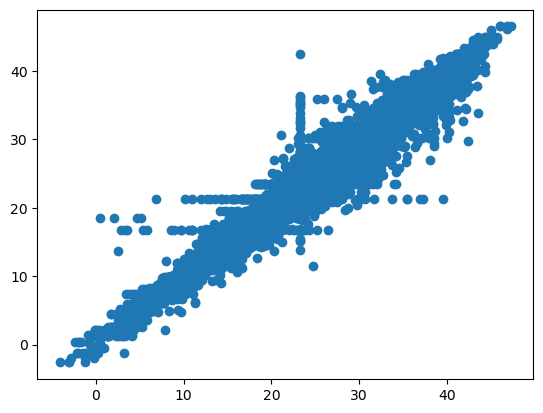

In [12]:
plt.scatter(y_test, predictions)

<Axes: xlabel='MaxTemp', ylabel='Count'>

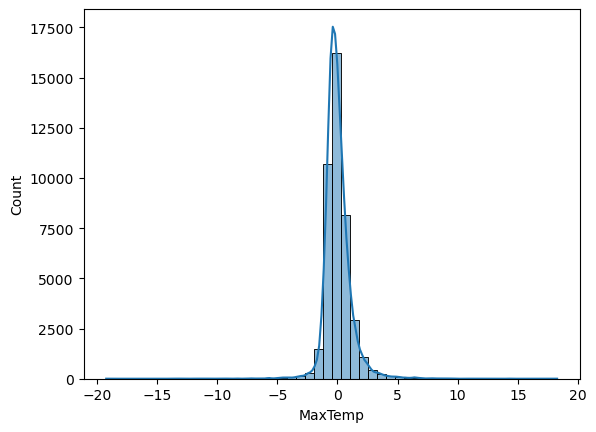

In [13]:
sns.histplot((y_test-predictions), bins=50, kde=True)

In [14]:
print('R2:', metrics.r2_score(y_test, predictions))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

R2: 0.9739245290214452
MAE: 0.7399964741062685
MSE: 1.3350242281103768
RMSE: 1.1554324853103173
